In [48]:
#imports cell
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data_mall = pd.read_csv('Mall_Customers.csv')

In [3]:
data_mall.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
46,47,Female,50,40,55
166,167,Male,42,86,20
65,66,Male,18,48,59
139,140,Female,35,74,72
119,120,Female,50,67,57
162,163,Male,19,81,5
128,129,Male,59,71,11
193,194,Female,38,113,91
48,49,Female,29,40,42
60,61,Male,70,46,56


In [4]:
data_mall.shape

(200, 5)

In [7]:
# change Col Name
replaced_colname = ['cust_id', 'gender', 'age', 'income', 'spending']
colname = data_mall.columns.tolist()
dict_colname = dict(zip(colname, replaced_colname))

data_mall = data_mall.rename(columns=dict_colname)

In [8]:
data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Simple exploration

In [9]:
# Gender 
data_mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [11]:
# Age
data_mall.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

In [12]:
data_mall.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [14]:
data_mall.spending.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending, dtype: float64

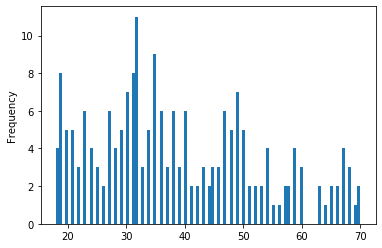

In [19]:
# Histogram
data_mall.age.plot(kind='hist', bins=100)

In [21]:

data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1st Trials

In [22]:
X = data_mall[['age', 'income', 'spending']]

In [42]:
Km = KMeans(n_clusters=4)

In [43]:
Km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
data_mall['clus1'] = Km.predict(X)


In [45]:
data_mall.sample(4)

,cust_id,gender,age,income,spending,clus1
199,200,Male,30,137,83,1
188,189,Female,41,103,17,2
167,168,Female,33,86,95,1
122,123,Female,40,69,58,0


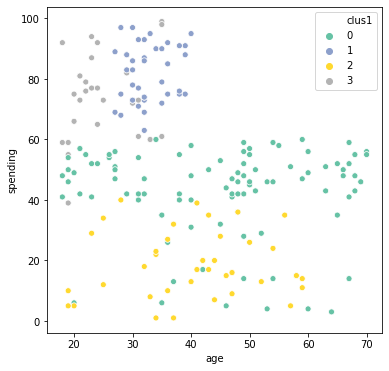

In [47]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_mall, palette='Set2', x='age', y='spending', hue='clus1')

### PCA

In [50]:
pca_model = PCA(n_components=2)
pca_model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
data_mall[['pca_1', 'pca_2']] = pd.DataFrame(pca_model.transform(X))

In [52]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2
112,113,Female,38,64,42,0,-4.259618,7.375583
76,77,Female,45,54,53,0,-2.822886,-6.104467
68,69,Male,19,48,59,3,3.274576,-17.803298
124,125,Female,23,70,29,2,-8.111114,17.722236
177,178,Male,27,88,69,1,33.168388,9.840317


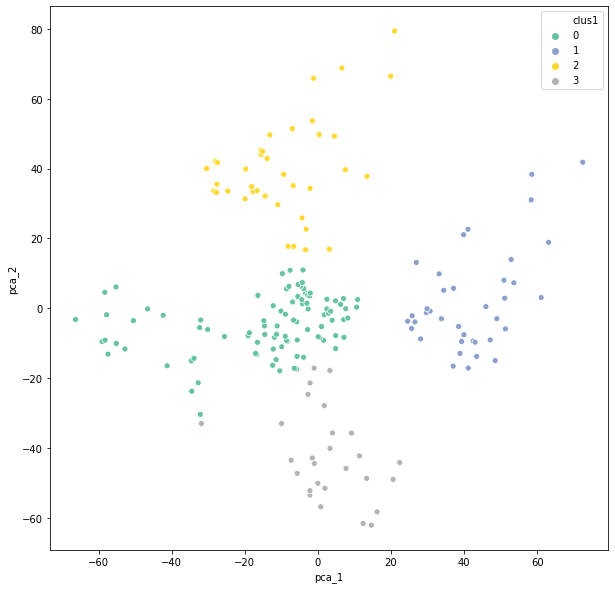

In [55]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus1')